<a href="https://colab.research.google.com/github/MuhammadSaadKhan1100/Data_Science/blob/main/Weather_Predictor_(Naive_Bayes).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Weather Predictor** 🌞😎🌦🌨🌦🌤
# **Made by:** 👯‍♂️🤺
* Muhammad Saad Khan
* Hamza Imran
* Arsalan Tariq



# **Importing random modules:**🎁📦



In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

# **Reading CSV file using pandas** 🐼


In [24]:
df = pd.read_csv('Weather.csv')
df.head(5)

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,1/1/2009 0:00,24,10,0,8.7,4,1,31,9:56 AM,9:45 PM,...,11,21,17,50,0.0,1015,11,10,320,10
1,1/1/2009 1:00,24,10,0,8.7,4,1,31,9:56 AM,9:45 PM,...,12,22,11,52,0.0,1015,11,10,315,11
2,1/1/2009 2:00,24,10,0,8.7,4,1,31,9:56 AM,9:45 PM,...,12,23,6,55,0.0,1015,11,10,310,11
3,1/1/2009 3:00,24,10,0,8.7,4,1,31,9:56 AM,9:45 PM,...,12,23,0,57,0.0,1015,10,10,304,12
4,1/1/2009 4:00,24,10,0,8.7,4,1,31,9:56 AM,9:45 PM,...,14,19,0,54,0.0,1016,11,10,302,11


# **Encoding the strings to Numerical values (Preparing data for training...)** 🚦🔢

In [5]:
Numerics = LabelEncoder()

# **Dropping the target variable and make it as a newframe** 🌠

In [25]:
inputs = df.drop('tempC',axis = 'columns')
target = df['tempC']
target

0        11
1        11
2        11
3        10
4        11
         ..
96427    13
96428    13
96429    13
96430    13
96431    12
Name: tempC, Length: 96432, dtype: int64

# **Creating New Dataframe** 🖼

In [26]:
inputs['maxtempC_new']=Numerics.fit_transform(inputs['maxtempC'])
inputs['mintempC_new']=Numerics.fit_transform(inputs['mintempC'])
inputs['humidity_new']=Numerics.fit_transform(inputs['humidity'])
inputs['windspeedKmph_new']=Numerics.fit_transform(inputs['windspeedKmph'])
inputs


,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,humidity,precipMM,pressure,visibility,winddirDegree,windspeedKmph,maxtempC_new,mintempC_new,humidity_new,windspeedKmph_new
0,1/1/2009 0:00,24,10,0,8.7,4,1,31,9:56 AM,9:45 PM,...,50,0.0,1015,10,320,10,9,7,48,10
1,1/1/2009 1:00,24,10,0,8.7,4,1,31,9:56 AM,9:45 PM,...,52,0.0,1015,10,315,11,9,7,50,11
2,1/1/2009 2:00,24,10,0,8.7,4,1,31,9:56 AM,9:45 PM,...,55,0.0,1015,10,310,11,9,7,53,11
3,1/1/2009 3:00,24,10,0,8.7,4,1,31,9:56 AM,9:45 PM,...,57,0.0,1015,10,304,12,9,7,55,12
4,1/1/2009 4:00,24,10,0,8.7,4,1,31,9:56 AM,9:45 PM,...,54,0.0,1016,10,302,11,9,7,52,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96427,1/1/2020 19:00,15,11,0,7.1,4,1,37,11:13 AM,11:00 PM,...,61,0.0,1019,8,74,11,0,8,59,11
96428,1/1/2020 20:00,15,11,0,7.1,4,1,37,11:13 AM,11:00 PM,...,61,0.0,1020,9,81,11,0,8,59,11
96429,1/1/2020 21:00,15,11,0,7.1,4,1,37,11:13 AM,11:00 PM,...,62,0.0,1020,10,88,11,0,8,60,11
96430,1/1/2020 22:00,15,11,0,7.1,4,1,37,11:13 AM,11:00 PM,...,63,0.0,1020,10,85,11,0,8,61,11


# **Dropping the string values** 💧

In [38]:
inputs_new = inputs.drop(['maxtempC','mintempC','humidity','windspeedKmph','date_time','moonrise','moonset','sunrise','sunset','totalSnow_cm',	'sunHour',	'uvIndex',	'uvIndex.1',	'moon_illumination',	'DewPointC',	'FeelsLikeC',	'HeatIndexC',	'WindChillC',	'WindGustKmph',	'cloudcover',	'precipMM',	'pressure',	'visibility',	'winddirDegree'],axis = 'columns')
inputs_new

,maxtempC_new,mintempC_new,humidity_new,windspeedKmph_new
0,9,7,48,10
1,9,7,50,11
2,9,7,53,11
3,9,7,55,12
4,9,7,52,11
...,...,...,...,...
96427,0,8,59,11
96428,0,8,59,11
96429,0,8,60,11
96430,0,8,61,11


# **Producing Graph overall for training** 📈📉

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7faf398c2e50>,
      dtype=object)

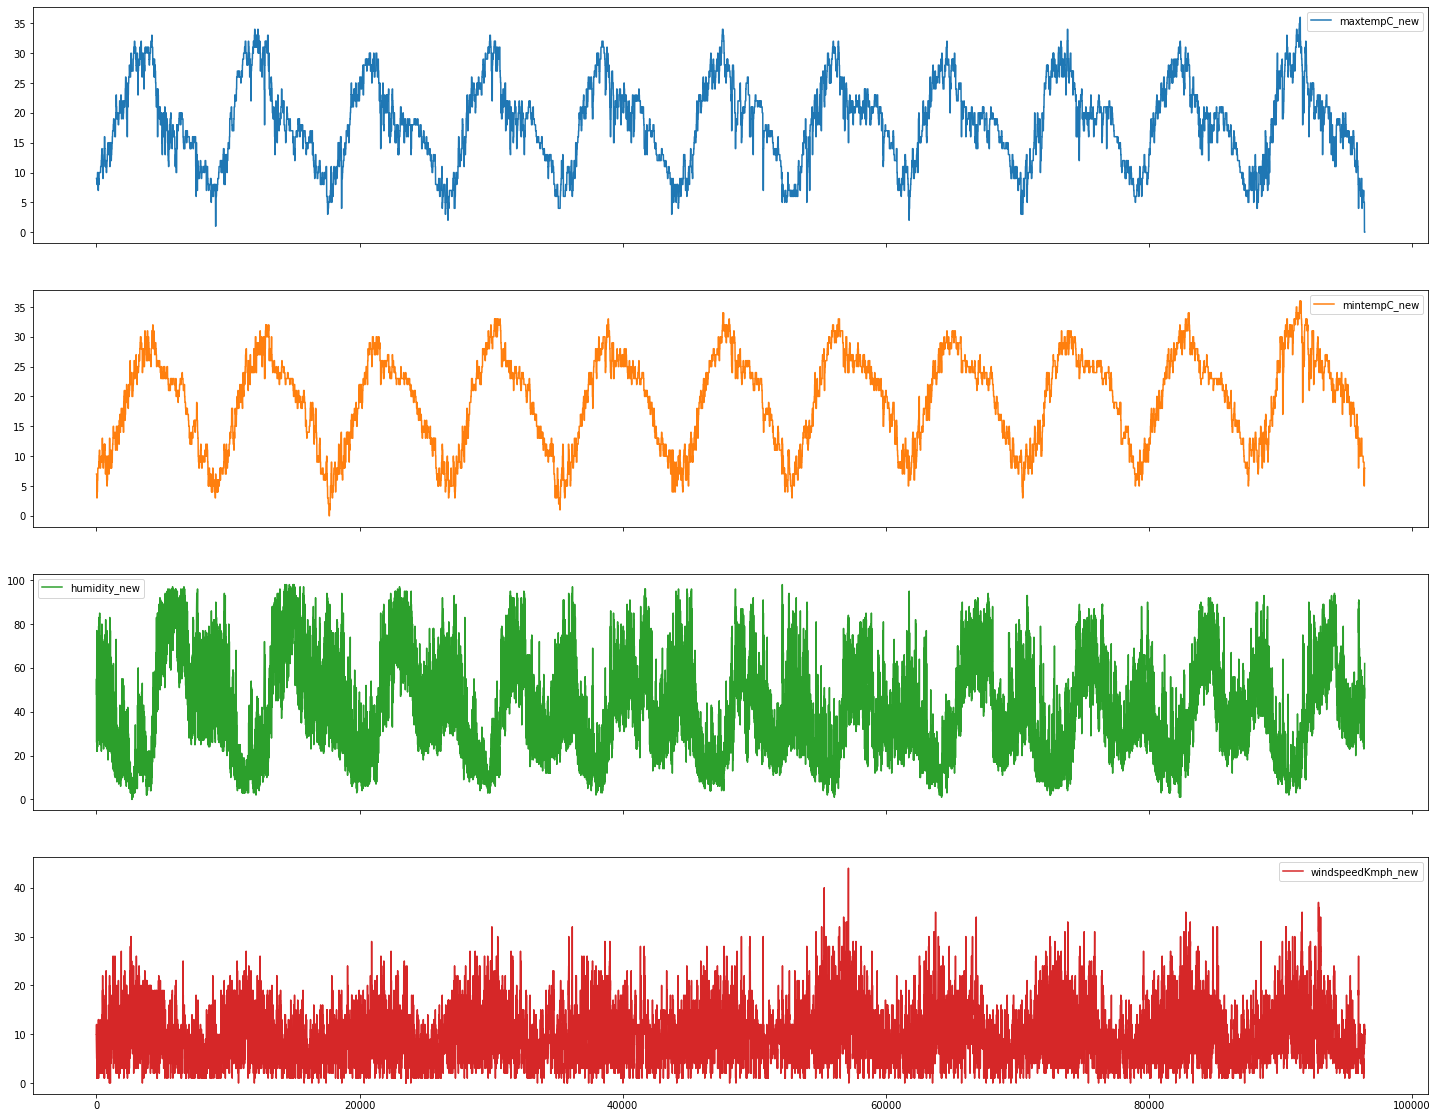

In [43]:
inputs_new.plot(subplots=True, figsize=(25,20))

# **Producing Histograms for training:** 🅱🅱🅱 


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faf396c9fd0>,
      dtype=object)

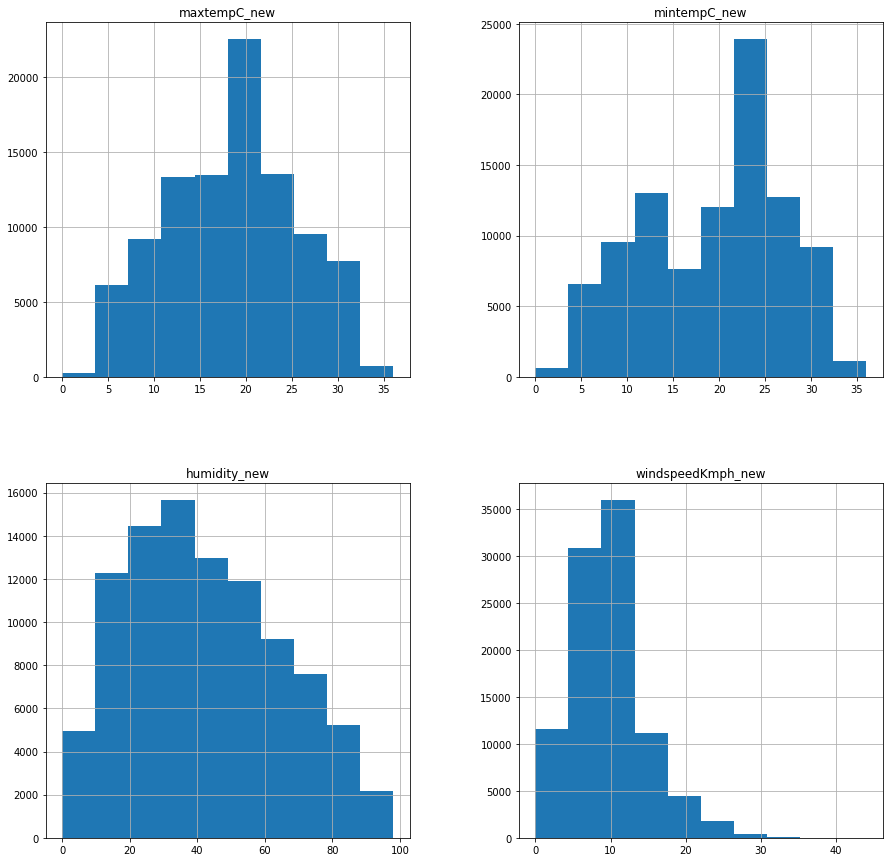

In [45]:
inputs_new.hist(bins=10,figsize=(15,15))

# **Applying Gaussian NaiveBayes** 👶🏻🐣

In [46]:
classifier = GaussianNB()
classifier.fit(inputs_new,target)

GaussianNB()

# **Checking Accuracy of our Classifier** ✅👨🏻‍🏫

In [47]:
classifier.score(inputs_new,target)
# 13% accuracy

0.13030944084951054

# **Finally It's time for prediction** 🤓😵

In [48]:
classifier.predict([[9,7,59,11]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([12])